## Name: Krishnakanth N.
## Index No: 190323C

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

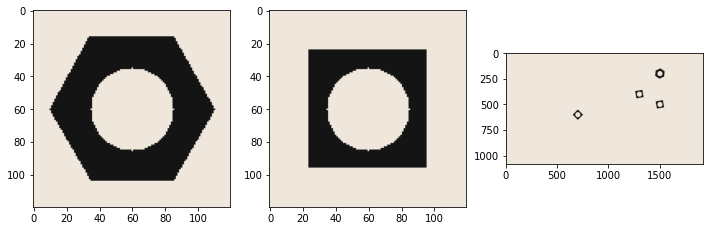

In [2]:
hex_temp = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
square_temp =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
belt_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3, figsize = (12,8))
ax[0].imshow(cv.cvtColor(hex_temp, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(square_temp, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(belt_f100, cv.COLOR_RGB2BGR))
plt.show()

### Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image

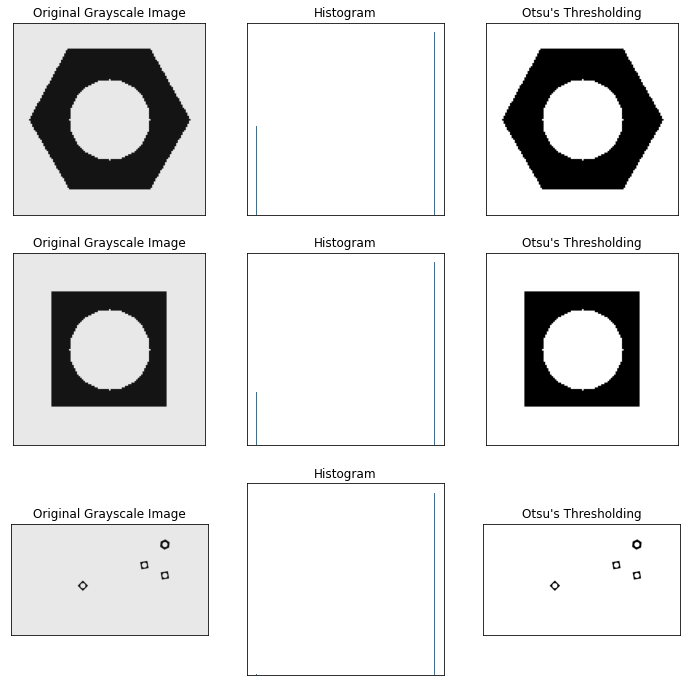

Threshold for hexnut_template =  20.0
Threshold for squarenut_template =  20.0
Threshold for conveyor_f100 =  20.0


In [3]:
hex_temp_gray = cv.imread('hexnut_template.png', cv.IMREAD_GRAYSCALE)
square_temp_gray =  cv.imread('squarenut_template.png', cv.IMREAD_GRAYSCALE)
belt_f100_gray =  cv.imread('conveyor_f100.png', cv.IMREAD_GRAYSCALE)

# Otsu's thresholding
ret1,hex_th = cv.threshold(hex_temp_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,square_th = cv.threshold(square_temp_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,belt_f100_th = cv.threshold(belt_f100_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

images = [hex_temp_gray, 0, hex_th,
          square_temp_gray, 0, square_th,
          belt_f100_gray, 0, belt_f100_th]
titles = ['Original Grayscale Image','Histogram',"Otsu's Thresholding",
            'Original Grayscale Image','Histogram',"Otsu's Thresholding",
          'Original Grayscale Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(12,12))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(cv.cvtColor(images[i*3], cv.COLOR_GRAY2BGR))
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()
print('Threshold for hexnut_template = ', ret1)
print('Threshold for squarenut_template = ', ret2)
print('Threshold for conveyor_f100 = ', ret3)

### Carry out morphological closing to remove small holes inside the foreground. Use a 3x3 kernel

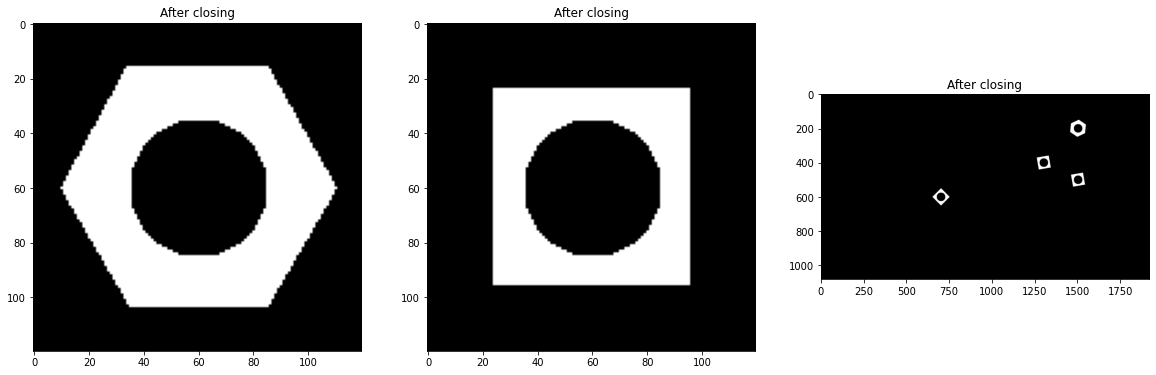

In [4]:
kernel = np.ones((3,3),np.uint8)
hex_th = np.invert(hex_th)
square_th = np.invert(square_th)
belt_f100_th = np.invert(belt_f100_th)
closing_hex_temp = cv.morphologyEx(hex_th, cv.MORPH_CLOSE, kernel)
closing_square_temp = cv.morphologyEx(square_th, cv.MORPH_CLOSE, kernel)
closing_belt_f100 = cv.morphologyEx(belt_f100_th, cv.MORPH_CLOSE, kernel)
fig, ax = plt.subplots(1,3,figsize =(20,10))
ax[0].imshow(closing_hex_temp,'gray')
ax[0].set_title("After closing")
ax[1].imshow(closing_square_temp,'gray')
ax[1].set_title("After closing")
ax[2].imshow(closing_belt_f100,'gray')
ax[2].set_title("After closing")
plt.show()

### Connected components analysis

Number of connected Hex nuts:  2
Number of connected Square nuts:  2
Number of connected Belts:  2


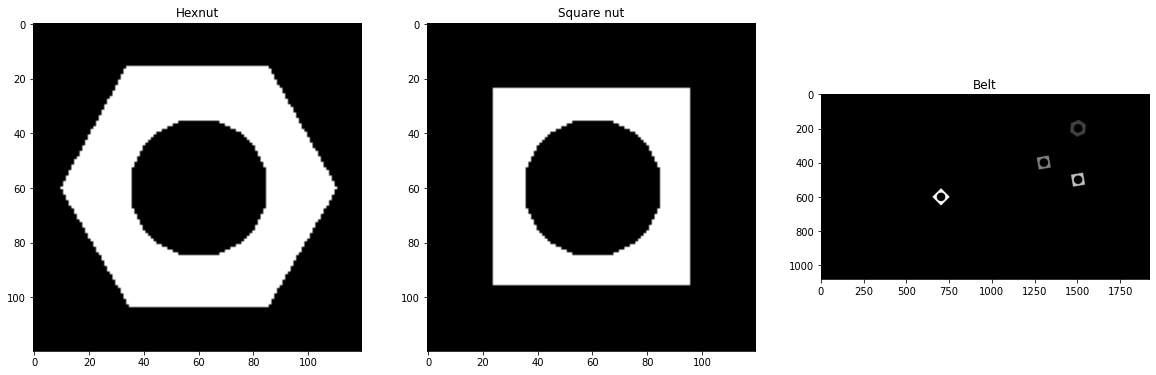

In [5]:
connectivity = 8
[num_lables_hex, lables_hex, stats_hex, centroids_hex] = cv.connectedComponentsWithStats(closing_hex_temp,connectivity, cv.CV_32S)
[num_lables_square, lables_square, stats_square, centroids_square] = cv.connectedComponentsWithStats(closing_square_temp,connectivity, cv.CV_32S)
[num_lables_belt, lables_belt, stats_belt, centroids_belt] = cv.connectedComponentsWithStats(closing_belt_f100,connectivity, cv.CV_32S)

fig, ax = plt.subplots(1,3, figsize=(20, 10))
ax[0].imshow(lables_hex, "gray")
ax[0].set_title("Hexnut")
ax[1].imshow(lables_square, "gray")
ax[1].set_title("Square nut")
ax[2].imshow(lables_belt, "gray")
ax[2].set_title("Belt")

print("Number of connected Hex nuts: ", num_lables_hex)
print("Number of connected Square nuts: ", num_lables_hex)
print("Number of connected Belts: ", num_lables_hex)
plt.show()

* Statistics is a stats matrix calculated by the function for each component type.
* The number of rows of the matrix represents the number of components belonging to a particular category.(number of labels)
* The number of columns is 5 and they represent the folowing
    1) Leftmost coordinate which is the inclusive start of the bounding box in the horizontal direction.
    2) Topmost coordinate which is the inclusive start of the bounding box in the vertical direction.
    3) The horizontal size of the bounding box
    4) The vertical size of the bounding box
    5) The total area (in pixels) of the connected component
* Centroids are the coordinates of the center of the bounding box

### Area of Hex Nut

In [6]:
#area of the hexnut
area = stats_hex[1, cv.CC_STAT_AREA]#index 0 represenst the background & 1 represents the component
print("Area of the hexnut object(in pixels): ", area)

Area of the hexnut object(in pixels):  4728


### Contour analysis

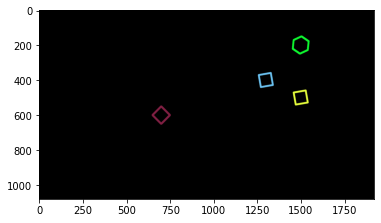

In [7]:
import random

belt_contours, belt_hierarchy = cv.findContours(belt_f100_th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

random.seed(1)
img = np.zeros((1080,1920,3),dtype=np.uint8)
for i in range(len(belt_contours)):
    color = (random.randint(0,255), random.randint(0,255), random.randint(0,255)) 
    cv.drawContours(img, belt_contours, i, color,10, cv.LINE_8, belt_hierarchy,0)

plt.imshow(cv.cvtColor(img,cv.COLOR_RGB2BGR))
plt.show()

In [8]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)

cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []   
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    
    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


### Count the number of matching hexagonal nuts in conveyor_f100.png

Hex nuts in frame 1 = 1
Square nuts in frame 1 = 3


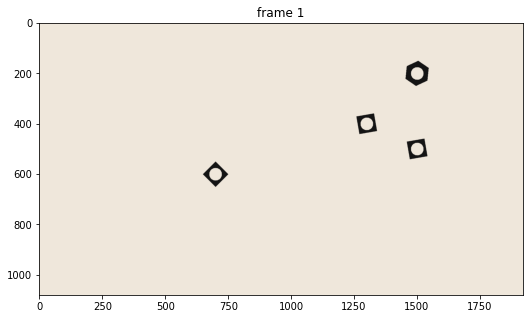

In [9]:
hex_contours, hex_hierarchy = cv.findContours(hex_th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
square_contours, square_hierarchy = cv.findContours(square_th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

def count(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret , img = cv.threshold(img, 0,255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    img = np.invert(img)
    img = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

    contours, hierarchy = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    hex_count = 0
    sqr_count = 0
    for i in range(len(contours)):
        for j in range(len(hex_contours)):
            ret = cv.matchShapes(contours[i], hex_contours[j], 1, 0.0)
            if ret < 0.001:
                hex_count += 1
        
        for j in range(len(hex_contours)):
            ret = cv.matchShapes(contours[i], square_contours[j], 1, 0.0)
            if ret < 0.001:
                sqr_count += 1

    return (hex_count, sqr_count)

belt_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)
(hex_count_f100 ,sqr_count_f100) = count(belt_f100)
print("Hex nuts in frame 1 =", hex_count_f100)
print("Square nuts in frame 1 =", sqr_count_f100)

fig, ax = plt.subplots(1, 1, figsize = (10, 5))
ax.imshow(cv.cvtColor(belt_f100, cv.COLOR_RGB2BGR))
ax.set_title("frame 1")
plt.show()

### Count the number of objects that were conveyed along the conveyor belt

In [10]:
frame_array = []

cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)

cap = cv.VideoCapture('conveyor.mp4')
f = 0  
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    
    frame_array.append(frame)
    
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [11]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
frame_array = [] 
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    frame_array.append(frame)
    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

shape = (1080, 1920, 3)
current_hex_count = []
current_square_count = []
total_hex_count = []
total_square_count = []
# Your code here
for i in range(len(frame_array)):
    hex_count , square_count = count(frame_array[i])

    if i == 0:
        total_hex_count.append(hex_count)
        total_square_count.append(square_count)
    else:
        if hex_count > current_hex_count[-1]:
            total_hex_count.append(total_hex_count[-1] + hex_count - current_hex_count[-1])
            
        else:
            total_hex_count.append(total_hex_count[-1])

        if square_count > current_square_count[-1]:
            total_square_count.append(total_square_count[-1] + square_count - current_square_count[-1])
            
        else:
            total_square_count.append(total_square_count[-1])
    
    current_hex_count.append(hex_count)
    current_square_count.append(square_count)

out = cv.VideoWriter('./conveyor_result_190323C.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    text = "Hex nut count in frame = " + str(current_hex_count[i]) 
    cv.putText(frame_array[i], text , (900, 900), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 1, cv.LINE_AA)

    text = "Hex nut total count = " + str(total_hex_count[i])
    cv.putText(frame_array[i], text , (900, 930), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 1, cv.LINE_AA)

    text = "Square nut count in frame = " + str(current_square_count[i]) 
    cv.putText(frame_array[i], text , (900, 960), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 1, cv.LINE_AA)

    text = "Square nut total count = " + str(total_square_count[i])
    cv.putText(frame_array[i], text , (900, 990), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 1, cv.LINE_AA)
    
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
